# Supervised Learning
- Linear Regression
- Nonlinear Regression

          X         y
0  0.000000  2.754932
1  0.101010  1.267315
2  0.202020 -1.797223
3  0.303030  3.282525
4  0.404040 -0.316798
5  0.505051  4.118226
6  0.606061  5.480533
7  0.707071  2.201469
8  0.808081  4.353367
9  0.909091  2.245420


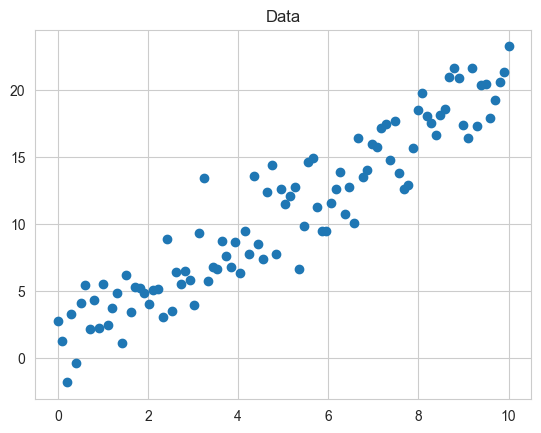

In [1]:
# Linear Regression
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Create a dummy linear dataset with 100 data points
X = np.linspace(0, 10, 100)
y = 2 * X + 1 + np.random.randn(100) * 2
X = X.reshape(-1, 1)

df = pd.DataFrame({'X': X.flatten(), 'y': y})
print(df.head(10))

# plot the data
plt.scatter(X, y)
plt.title("Data")
plt.show()

In [ ]:
# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)
# Get the slope and intercept of the line best fit
print("Model coefficient:", model.coef_, "\n")
print("Model intercept:", model.intercept_, "\n")

# plot the data and the best fit line
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.legend(['Labeled Data', 'Best fit line'])
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression with best fit line")
plt.show()


In [ ]:
# Predict the response for a new data point
X_new = np.array([[7.82]])
y_pred = model.predict(X_new)

print("Predicted response for X_new:", round(y_pred.item(), 2))

# plot the data and the best fit line and the new data point
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red',)
plt.scatter(X_new, y_pred, color='red', marker='x')
plt.legend(['Labeled Data', 'Best fit line', 'New data point'])
plt.text(X_new - 1.5, y_pred + 2,
         round(y_pred.item(), 2), fontsize=12, color='red')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression with best fit line and new data point")
plt.show()

# Nonlinear Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Create a dummy dataset with 100 data points with polynomial shape
X = np.linspace(-5, 5, 100)
y = X ** 3 + np.random.randn(100) * 5
X = X.reshape(-1, 1)

plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Data")
plt.show()

# 1: Determining the degree of the polynomial
# Create a polynomial feature object with degree 2
# y = ß0 + ß1x + ß2x2 + ß3x3
poly = PolynomialFeatures(degree=3, include_bias=False)

# 2: Creating the new features
poly_features = poly.fit_transform(X.reshape(-1, 1))
print("Original features:", X[:5], "\n")
print("New features:", poly_features[:5], "\n")

# 3: Creating the polynomial regression model
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y)

# # Get the slope and intercept of the line best fit
print("Model coefficient:", poly_reg_model.coef_, "\n")
print("Model intercept:", poly_reg_model.intercept_, "\n")

# # Get y_pred
y_pred = poly_reg_model.predict(poly_features)

# # plot the data and the best fit line
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.legend(['Labeled Data', 'Best fit line'])
plt.xlabel("X")
plt.ylabel("y")
plt.title("Polynomial Regression with best fit line")
plt.show()

# # Predict the response for a new data point
X_new = np.array([[7.08]])
X_new_transformed = poly.fit_transform(X_new.reshape(-1, 1))
y_new_pred = poly_reg_model.predict(X_new_transformed)

print("Predicted response for X_new:", round(y_new_pred.item(), 2))

# # plot the data and the best fit line and the new data point
plt.scatter(X, y)
plt.plot(X, y_pred, color='red',)
plt.scatter(X_new, y_new_pred, color='red', marker='x')
plt.legend(['Labeled Data', 'Best fit line', 'New data point'])
plt.text(X_new - 2, y_new_pred + 2.5,
         round(y_new_pred.item(), 2), fontsize=12, color='red')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Polynomial Regression with X = 7.08")
plt.show()

# # A polynomial regression model with multiple features

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(1)
x_1 = np.absolute(np.random.randn(100, 1) * 10)
x_2 = np.absolute(np.random.randn(100, 1) * 30)
y = 2 * x_1 ** 2 + 3 * x_1 + 2 + np.random.randn(100, 1) * 20

# 1: Storing the variables in a dataframe
df = pd.DataFrame({'x_1': x_1.flatten(), 'x_2': x_2.flatten(), 'y': y.flatten()})
print(df.head(10))

# 2: Creating the new features
X, y = df[["x_1", "x_2"]], df["y"]
poly_features = poly.fit_transform(X)
print("Original features:", X[:5], "\n")
print("New features:", poly_features[:5], "\n")

# 3: Creating the polynomial regression model
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y)

# Get the order of features to understand the polynomial regression
print("Feature ordering:", poly.get_feature_names_out())

# # Get the slope and intercept of the line best fit
print("Model coefficient:", poly_reg_model.coef_,)
print("Model intercept:", poly_reg_model.intercept_, "\n")

# # Get y_pred
y_pred = poly_reg_model.predict(poly_features)

from sklearn.metrics import r2_score
poly_reg_r2 = r2_score(y, y_pred)
print("R Squared Error:", poly_reg_r2)